# Why Asymptotics?

Suppose we believe that our data satisfy a linear model of the form

$$ y_i = X_i'\beta + \epsilon_i$$

We know how to estimate $\beta$:

$$ \hat{\beta}_n = (X'X)^{-1}(X'y)$$

But - unless we somehow know the true distribution of our data observations - we do not know the distribution of $\hat{\beta}_n$. To get around this we use _asymptotics_: we approximate the distribution by that which would obtain if we were able to observe a sample of size $\infty$.

As we have seen in class, under some weak conditions, the OLS estimator $\hat{\beta}_n$ is asymptotically normal:

$$ \sqrt{n}(\hat\beta_n - \beta) \xrightarrow{D} \mathcal{N}(0, \Omega)$$

One task we may want to perform is a hypothesis test on a coefficient. For example we may be interested in whether $\beta_1 = 0$ ($H_0$, our _null hypothesis_) or $\beta_1\neq 0$ ($H_1$, our _alternative hypothesis_).

Asymptotics allow us to do this by using our _asymptotic approximation_ to the distribution of $\hat\beta_n$. 

Lets see an example:

In [122]:
# Load libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sps
import matplotlib.pyplot as plt

# Load dataset

df = sm.datasets.get_rdataset("Clothing", "Ecdat").data
df.drop(["sales", "margin", "nown", "naux", "hourspw", "start", "inv2"], axis = 1, inplace=True)

In [26]:
# Rescale to 1000s of Guilders
df.loc[:, "tsales"] = df.loc[:, "tsales"] / 1000
df.loc[:, "inv1"] = df.loc[:, "inv1"] / 1000

# View dataset
df.head()


,tsales,nfull,npart,hoursw,inv1,ssize
0,750.000,1.0000,1.0000,76,17.16667,170
1,1926.395,2.0000,3.0000,192,17.16667,450
2,1250.000,2.0000,2.2222,114,292.85720,300
3,694.227,1.0000,1.2833,100,22.20704,260
4,750.000,1.9556,1.2833,104,22.20704,50


This dataset is data on clothing sales in the Netherlands in 1990. The variables are: 

tsales - total sales

nfull  - number of full time workers

npart  - number of part time workers

hoursw - total number of hours worked

inv1   - investment in shop-premises 

ssize  - shop size

We may want to test whether investment in shop premises affects sales. The following code estimates the following regression equation:

$$ tsales  = \beta_0 + \beta_1 nfull + \beta_2 npart + \beta_3 hoursw + \beta_4 inv1 + \beta_5 ssize + \epsilon $$

and then performs a test of $H_0: \beta_4 = 0$ against $H_1: \beta_4 \neq 0$. 

In [29]:
y = df.loc[:, "tsales"]
X = df.loc[:, df.columns[1:]]
X = sm.add_constant(X)

mod = sm.OLS(y, X).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tsales   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           6.45e-75
Time:                        12:28:05   Log-Likelihood:                -2934.3
No. Observations:                 400   AIC:                             5881.
Df Residuals:                     394   BIC:                             5904.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -263.9134     55.211     -4.780      0.000    -372.458    -155.368
nfull        126.7016     22.237      5.698      0.000      82.984     170.419
npart        136.9222     29.327      4.669      0.000      79.264     194.580
hoursw         4.3848      0.394     11.122      0.000       3.610       5.160
inv1          -0.0722      0.182     -0.396      0.692      -0.431       0.286
ssize          0.6223      0.213      2.918      0.004       0.203       1.042
==============================================================================
Omnibus:                      164.095   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1405.364
Skew:                           1.508   Prob(JB):                    6.75e-306
Kurtosis:                      11.673   Cond. No.                         738.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That we cannot reject the null hypothesis $H_0$, that $\beta_4 =0$ at conventional significance levels can be read off the preceeding output, since its p-value is 0.692. 

We can also establish this using the wald_test method, which performs a Wald test. This is more flexible and can be used to additionally test other hypotheses. 

In [45]:
Wald = mod.wald_test([0, 0, 0, 0, 1, 0], use_f=False, scalar=True)

# Run the test at 5% significance level
print(Wald.statistic > sps.chi2(Wald.df_denom).ppf(1-0.05))

# Print the p-value
print(Wald.pvalue)



False
0.6922782226853195


# How does this work?

We calculate a statistic, here the Wald statistic, which is 

$$W = \frac{n(\hat{\beta}_4  - 0)^2}{\hat{\Omega}_{44}} $$

This is the square of 

$$ t = \frac{\sqrt{n}(\hat{\beta}_4  - 0)}{\hat{\Omega}_{44}^{1/2}} = \frac{\sqrt{n}\hat{\beta}_4}{\hat{\Omega}_{44}^{1/2}} $$

Provided that $\beta_4 = 0$, and 

$$ \sqrt{n}(\hat\beta_n - \beta) \xrightarrow{D} \mathcal{N}(0, \Omega) \qquad \text{ and } \qquad \hat{\Omega} \xrightarrow{P} \Omega$$

then 

$$ t = \frac{\sqrt{n}\hat{(\beta}_4  - \beta_4)}{\hat{\Omega}_{44}^{1/2}} \xrightarrow{D} \mathcal{N}(0, 1) $$

i.e. in large enough samples

$$ t \approx \mathcal{N}(0, 1)$$

which means that 

$$ W \approx \chi^2_{1}$$

Therefore we can compare our wald statistic $W$ to the $1-\alpha$ quantile of the $\chi^2_{1}$ distribution to perform the test. We reject $H_0$ if $W$ exceeds this quantile. 

Lets see this in action. We'll draw simulated data for a number of different sample sizes and see that as $n$ gets large $t$ is approximately standard normal (and so $W$ approximately $\chi^2_1$). 

In [168]:
np.random.seed(57362)

beta = np.random.uniform(-3, 3, 5)
beta = np.append(beta, 0.0)

corr = np.zeros((5, 5))
corr[np.tril_indices(5, -1)] = np.random.randint(0, 3 + 1, size = 10) / 10
corr[np.diag_indices(5)] = np.ones(5)
corr = corr + corr.T
var = np.zeros((5, 5))
var[np.diag_indices(5)] = np.random.uniform(1, 2, 5)

Sigma = var**(1/2) @ corr @ var**(1/2)

def simulate_data(n):

    X = np.random.multivariate_normal(np.zeros(5), Sigma, n)
    X = sm.add_constant(X)
    y = X @ beta + np.random.standard_t(8, n)

    return(y, X) 

def estimate_beta(y, X):
    return np.linalg.solve(X.T @ X, X.T @ y)

def estimate_avar(beta, y, X):
    e_hat = y - X @ beta
    s2hat = np.square(e_hat).mean()
    Mhat = X.T @ X / X.shape[0]
    return s2hat * np.linalg.inv(Mhat)

def compute_t(beta, avar, i, betai0, n):
    return n**(0.5) * (beta[i] - betai0) / avar[i,i]**(0.5)    

In [169]:
B = 5000
ns = [20, 50, 100, 500, 1000, 2000]

out = np.zeros((B, len(ns)))
for (j, n) in enumerate(ns):
    for b in range(B):

        y, X = simulate_data(n)
        betahat = estimate_beta(y, X)
        avarhat = estimate_avar(betahat, y, X)
        out[b, j] = compute_t(betahat, avarhat, 5, 0, n)   # test 6-th parameter


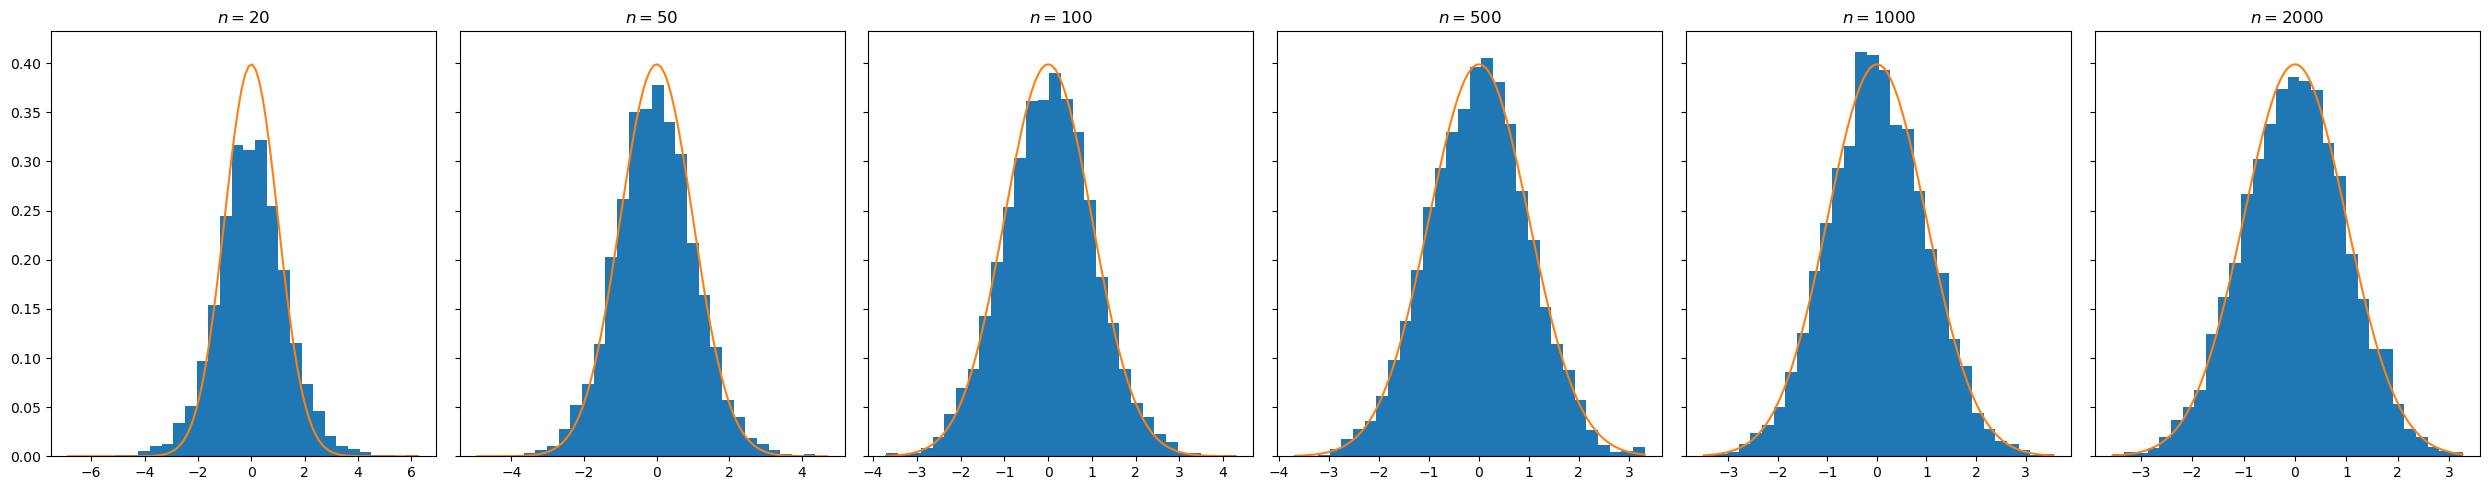

In [192]:
# Plot histograms - t 

fig, axs = plt.subplots(1, 6, sharey=True, tight_layout=True, figsize = (25, 5))
for (j, ax) in enumerate(axs):
    ax.hist(out[:, j], bins = 30, density=True)
    x = np.linspace(min(out[:, j]), max(out[:, j]), 100)
    ax.plot(x, sps.norm(0, 1).pdf(x))
    ax.set_title(r"$n = $" + str(ns[j]))
plt.show()
